<p style="text-align:center"> 
    <a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/" target="_blank"> 
    <img src="../assets/logo.png" width="200" alt="Flavio Aguirre Logo"> 
    </a>
</p>

<h1 align="center"><font size="7"><strong>📉 ByeBye Predictor</strong></font></h1>
<br>
<hr>

## Base "telco-customer" modeling (without feature engineering)

``Objective:`` To train and evaluate a predictive model using only the preprocessed Telco Customer Churn structured dataset, without adding variable engineering or text data. This will serve as a baseline for future improvements.

In [229]:
import joblib

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)

from xgboost import XGBClassifier


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [230]:
# Visual style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

<hr>

### Loading the preprocessed dataset

In [231]:
# Load the dataset
df = pd.read_csv('../data/processed/telco-customer-churn-processed.csv')

# Check for null values
assert df.isnull().sum().sum() == 0, "The dataset contains null values"

# Quick review
print(df.shape)
print(df.columns)

(7032, 31)
Index(['tenure', 'monthlycharges', 'totalcharges', 'gender_male',
       'seniorcitizen_yes', 'partner_yes', 'dependents_yes',
       'phoneservice_yes', 'multiplelines_no_phone_service',
       'multiplelines_yes', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinesecurity_no_internet_service',
       'onlinesecurity_yes', 'onlinebackup_no_internet_service',
       'onlinebackup_yes', 'deviceprotection_no_internet_service',
       'deviceprotection_yes', 'techsupport_no_internet_service',
       'techsupport_yes', 'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no_internet_service', 'streamingmovies_yes',
       'contract_one_year', 'contract_two_year', 'paperlessbilling_yes',
       'paymentmethod_credit_card_automatic', 'paymentmethod_electronic_check',
       'paymentmethod_mailed_check', 'churn'],
      dtype='object')


### Division into predictor and target variables

In [232]:
X = df.drop(columns='churn')
y = df['churn']

### Splitting into training and test sets

In [233]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

### Base Model Training

* ``Model 1: Logistic regression``

In [234]:
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


* ``Model 2: Decision tree``

In [235]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


* ``Model 3: RandomForest``

In [236]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


* ``Model 4: Support Vector Machine (SVM)``

In [237]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


* ``Model 5: XGBoost``

In [238]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


### Model Evaluation

In [239]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Some versions of SVM don't have predict_proba enabled by default
    try:
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    except:
        y_proba = None
        auc = "N/A"

    print(f"\nModel: {model.__class__.__name__}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("AUC-ROC:", auc) 
    print("-" * 40) 

    cm = confusion_matrix(y_test, y_pred) 
    disp = ConfusionMatrixDisplay(cm, display_labels=["No Churn", "Churn"]) 
    disp.plot(cmap="Blues") 
    plt.title(f"Confusion Matrix - {model.__class__.__name__}") 
    plt.savefig(f"../reports/figures/base-model-telco/confusion_matrix_{model.__class__.__name__}.png") 
    plt.show()


Model: LogisticRegression
Accuracy: 0.8056872037914692
Precision: 0.6556701030927835
Recall: 0.5668449197860963
F1 Score: 0.6080305927342257
AUC-ROC: 0.8378949560926547
----------------------------------------


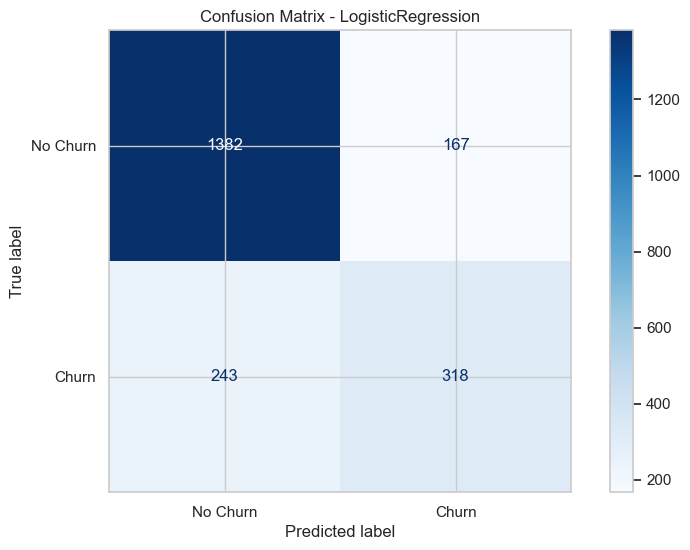


Model: DecisionTreeClassifier
Accuracy: 0.7127962085308057
Precision: 0.46256239600665555
Recall: 0.49554367201426025
F1 Score: 0.4784853700516351
AUC-ROC: 0.6440536071227599
----------------------------------------


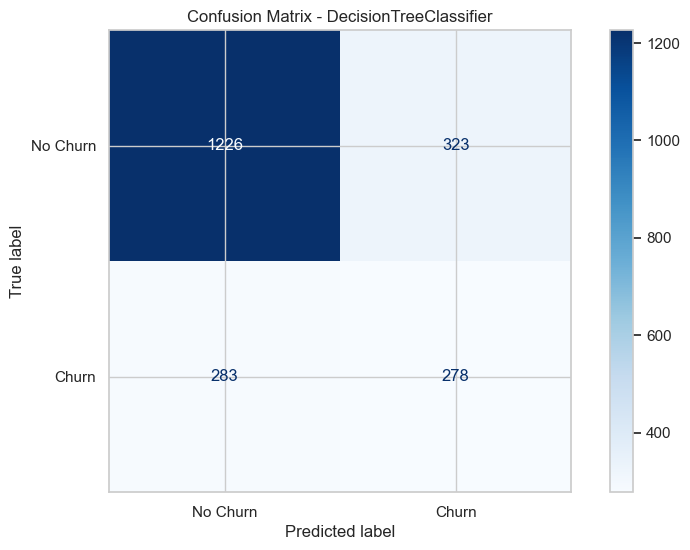


Model: RandomForestClassifier
Accuracy: 0.7862559241706161
Precision: 0.6273148148148148
Recall: 0.483065953654189
F1 Score: 0.5458207452165156
AUC-ROC: 0.8142542655890925
----------------------------------------


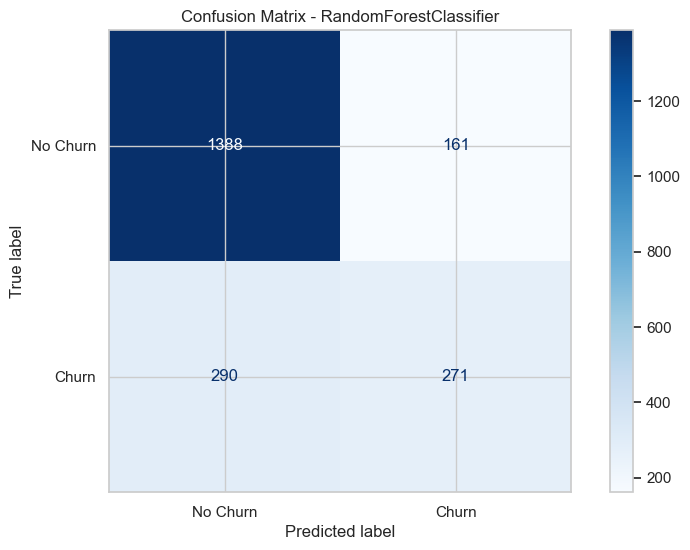


Model: SVC
Accuracy: 0.795260663507109
Precision: 0.6616541353383458
Recall: 0.47058823529411764
F1 Score: 0.55
AUC-ROC: 0.7924835642338397
----------------------------------------


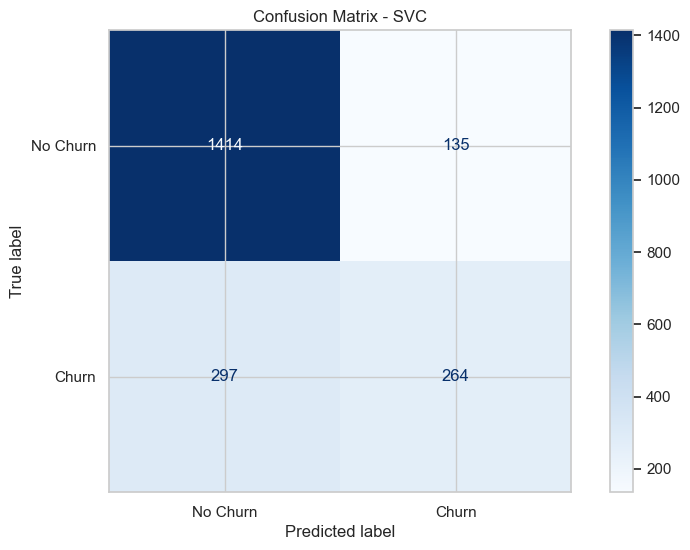


Model: XGBClassifier
Accuracy: 0.7791469194312797
Precision: 0.5967413441955194
Recall: 0.5222816399286988
F1 Score: 0.5570342205323194
AUC-ROC: 0.8140298668912955
----------------------------------------


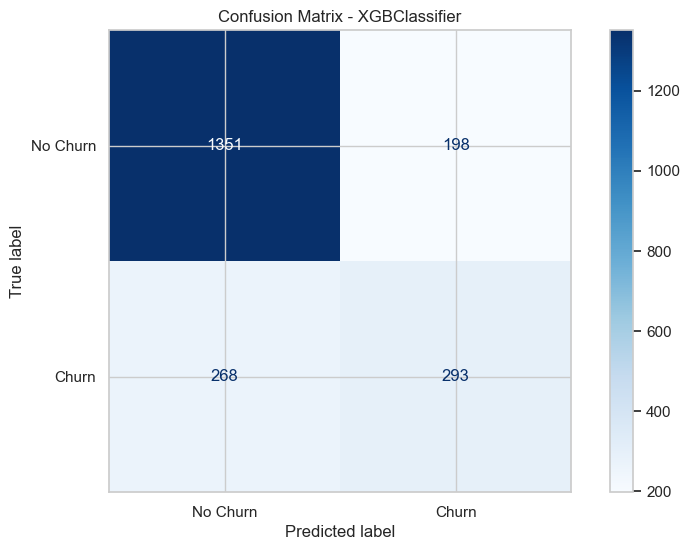

In [240]:
models = [log_model, tree_model, rf_model, svm_model, xgb_model]

for model in models:
    evaluate_model(model, X_test, y_test)

### Cross-Validation

We will implement a cross-validation procedure using a 5-fold K-Fold approach, with the goal of robustly evaluating the overall performance of each model so as not to rely solely on the measures used.

In [241]:
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost']

for name, model in zip(model_names, models):
    try:
        scores = cross_val_score(model, X, y, cv=5, scoring='f1')
        print(f"\n{name} - mean F1 (CV 5): {scores.mean():.4f}")
    except:
        print(f"{name} - mean F1 (CV 5): N/A")


Logistic Regression - mean F1 (CV 5): 0.5981

Decision Tree - mean F1 (CV 5): 0.4871

Random Forest - mean F1 (CV 5): 0.5490

SVM - mean F1 (CV 5): 0.5651

XGBoost - mean F1 (CV 5): 0.5500


<br>

<hr>

### Baseline Model Evaluation - Telco Customer Churn Dataset

In this stage, five classic classification models were trained and evaluated using the structured Telco Customer Churn dataset, which was already preprocessed but without performing any feature engineering or integration with external data. The main objective was to establish a baseline model that would allow the initial performance of the predictive system to be quantified and, based on this, justify future improvements.

Models evaluated:

* ``Logistic Regression``

* ``Decision Tree``

* ``Random Forest``

* ``Support Vector Machine (SVM)``

* ``XGBoost``

Each model was evaluated on a test set using key metrics such as accuracy, precision, recall, F1-score, and AUC-ROC. In addition, cross-validation (CV=5) with average F1 was included to assess its overall stability.

***Key Findings***

* ``The Logistic Regression model performed best overall``, with an ``AUC-ROC of 0.838`` and an ``F1 Score of 0.608``, indicating that, even with a linear structure and without fine-tuning, it captures relevant customer churn patterns.

* ``The Decision Tree``, while interpretive, showed weaker performance (``F1 = 0.478``) and lower generalization capacity (``AUC = 0.64``), highlighting potential overfitting or low information depth without feature engineering.

* ``Random Forest`` and ``XGBoost`` significantly improved over the individual tree, and although they did not outperform logistic regression in F1, they achieved a ``good compromise between precision and recall``. In particular, XGBoost achieved an AUC of 0.814, which is remarkable considering that no hyperparameter optimization or data enrichment has yet been performed.

* ``SVM`` showed good precision (0.66) but a somewhat ``lower recall (0.47)``, suggesting that its ability to detect positive cases (churning customers) could be improved with more specific tuning or feature transformation.

<hr>

### Conclusions and Next Steps:

This analysis shows that the models, even in their most basic form, already capture certain churn signals, especially Logistic Regression and XGBoost. However, there is still significant room for improvement:

* ``Structured Feature Engineering``: Incorporate derived variables, interactions, more sophisticated encoding, age or service binning, among others.

* ``Text Analysis``: Integrate features derived from sentiment analysis and topics present in Reddit comments, which can provide a valuable semantic layer to understand customer perception and predict churn.

* ``Hyperparameter Optimization``: Apply techniques such as GridSearchCV or Optuna to improve the most promising models (such as XGBoost and Logistic Regression).

* ``Error Analysis``: Study false positives and negatives to identify possible missed or misrepresented patterns in the current dataset.

<br>

### We save the base models

Finally, we save the first models to have evidence that the new techniques and methods we use actually improve our predictive model.

In [242]:
print("\nSaving models...\n")
joblib.dump(log_model, '../models/baseline/logistic_regression.pkl')
joblib.dump(tree_model, '../models/baseline/decision_tree.pkl')
joblib.dump(rf_model, '../models/baseline/random_forest.pkl')
joblib.dump(svm_model, '../models/baseline/svm.pkl')
joblib.dump(xgb_model, '../models/baseline/xgboost.pkl')
print("Models saved successfully.")


Saving models...

Models saved successfully.


<br>

<hr>

## Author

<a href="https://www.linkedin.com/in/flavio-aguirre-12784a252/">**Flavio Aguirre**</a>
<br>
<a href="https://coursera.org/share/e27ae5af81b56f99a2aa85289b7cdd04">***Data Scientist***</a>